# Let's Get Warmed Up

we will start out with some simple sklearn models and a standard dataset. 

Whilst we are using this to get the brain pumping and looks at some patterns we'll see repeating throughout the tutorial, we also want to ask and explore some questions.

 - Why do we tune hyperparameters?
 - What's a hyperparameter?
 - Why do I need so much compute anyway? I can train my model in 3 mins, job done.
 - What do you mean my f1 validation score is a random variable?

### Dependencies

In [3]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')

In [4]:
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

## Dataset

We are usig the Breast Cancer Dataset availale from sklearn.

Originally from the UCI Machine Learning Data Repository

![UCI](dataset.png)



The dataset is a binary classification problem.


In [5]:
features, labels = sklearn.datasets.load_breast_cancer(return_X_y=True)

30 features


[Text(0, 0, 'Benign'), Text(0, 0, 'Malignant')]

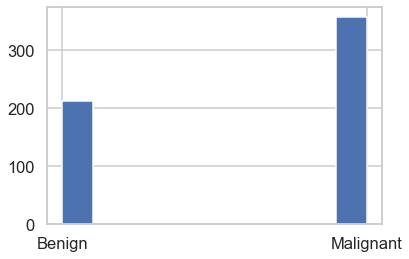

In [17]:
print(f"{features.shape[-1]} features")

_=plt.hist(labels)
plt.gca().set_xticks([0,1])
plt.gca().set_xticklabels(['Benign','Malignant'])

## Define a training function

In [37]:
def train(features, labels):
    
    # randomly split the dataset, no seed, it's different each time
    train_x, test_x, train_y, test_y = train_test_split(features,
                                                        labels,
                                                        test_size=0.25)
    
    # setup a pipeline
    pipeline = make_pipeline(RobustScaler(),
                              RandomForestClassifier(
                                  n_estimators=15,
                                  criterion="entropy",
                                  max_features="auto",
                                  bootstrap=True,
                                  random_state=42   # freeze the seed of the estimator
                              ))

    pipeline.fit(train_x, train_y)
    y_pred = pipeline.predict(test_x)
    return f1_score(y_pred, test_y)

In [38]:
score = train(features, labels)
print(f"F1 Score {score:.23f}")

F1 Score 0.97872340425531922925018


But is this the best score? the only score or the 'right' score?

In [42]:
score = train(features, labels)
print(f"F1 Score {score:.23f}")

F1 Score 0.97267759562841527021249


In [43]:
score = train(features, labels)
print(f"F1 Score {score:.23f}")

F1 Score 0.97826086956521740578552


In [44]:
score = train(features, labels)
print(f"F1 Score {score:.23f}")

F1 Score 0.96629213483146081387076


They are all differnt, why?

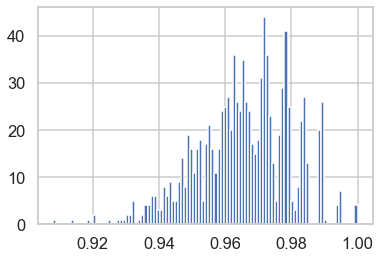

In [18]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
scores = []
for n in tqdm(range(1000)):
    scores.append(train(features, labels))
_=plt.hist(scores, 100)

Text(0.5, 1.0, 'Out of Bootstrap F1 Score Average: 0.966, Stddev 0.014 | Single Sample F1 Score 0.989')

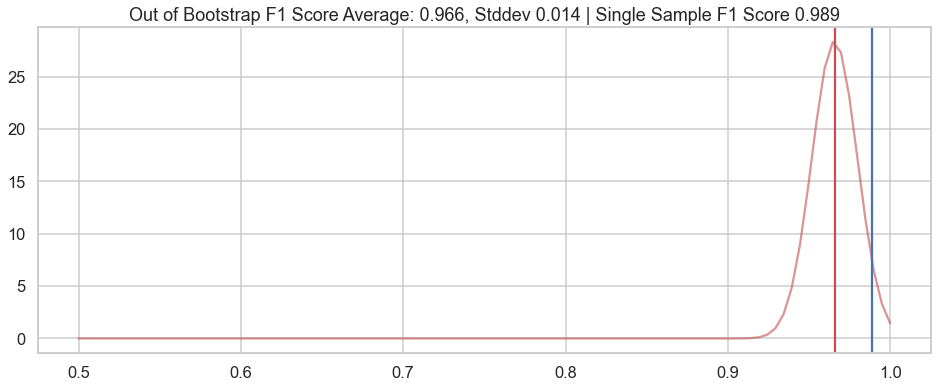

In [25]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(16,6))

mu, sigma = norm.fit(scores)
x = np.linspace(0.5, 1.0, 100)
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', alpha=0.6)
ax.axvline(mu, color="r")
score = train(features, labels)
ax.axvline(score, color="b")
ax.set_title(f"Out of Bootstrap F1 Score Average: {mu:.3f}, Stddev {sigma:.3f} | Single Sample F1 Score {score:.3f}")